In [1]:
!pip install wordcloud
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import math
!pip install textblob
from textblob import TextBlob
plt.style.use('fivethirtyeight')

In [2]:
amoxi = pd.read_csv("Amoxicillin Sentiments.csv", encoding='latin-1')

In [3]:
amoxi

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Word Count.1,Location,Retweet Count,Subjectivity,Polarity,Analysis
0,1,5.996285e+08,1.690000e+18,en,2023-08-21 10:26:24+00:00,RT @theliamnissan: Lauren Boebert calling for ...,21.0,lauren boebert calling abolishment dept educat...,12.0,NaN,3560,0.000000,0.000000,Neutral
1,2,1.090000e+18,1.690000e+18,en,2023-08-21 09:14:02+00:00,"@amerix I wish I had read seen post last week,...",26.0,wish had read seen post last week bought ascor...,19.0,NaN,0,0.066667,0.000000,Neutral
2,3,1.030000e+18,1.690000e+18,en,2023-08-21 09:09:19+00:00,"@bearish0411 if its COVID, amoxicillin will no...",23.0,its covid amoxicillin will not work pretty sur...,10.0,NaN,0,0.944444,0.375000,Positive
3,4,2.245928e+09,1.690000e+18,en,2023-08-21 09:09:16+00:00,"@missmulrooney alarm. got it. coincidentally, ...",14.0,alarm got coincidentally i have just started a...,10.0,NaN,0,0.000000,0.300000,Positive
4,5,1.590000e+18,1.690000e+18,en,2023-08-21 08:47:58+00:00,RT @skdembe: #BeAntibioticsAware... It's #Anti...,15.0,#beantibioticsaware it is #antibioticawareness...,8.0,NaN,1,0.300000,1.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,252,3.279965e+09,1.690000e+18,en,2023-08-14 14:01:33+00:00,Register now for this live webinar on GAS infe...,43.0,register now live webinar gas infections! facu...,23.0,NaN,0,0.466667,0.223485,Positive
250,253,1.560000e+18,1.690000e+18,en,2023-08-14 13:55:33+00:00,@BigLeeBronzer @bennyjohnson Yes it works for ...,19.0,yes it works among many other things amoxicil...,12.0,NaN,0,0.437500,0.187500,Positive
251,254,1.630000e+18,1.690000e+18,en,2023-08-14 12:55:52+00:00,"Amoxicillin, a versatile broad-spectrum antibi...",29.0,amoxicillin versatile broad-spectrum antibioti...,21.0,NaN,0,0.562500,0.262500,Positive
252,255,6.157062e+07,1.690000e+18,en,2023-08-14 12:27:23+00:00,Came into work with amoxicillin spit up all ov...,36.0,came into work amoxicillin spit up over cause ...,20.0,{'place_id': '00c55f041e27dc51'},0,0.647222,-0.397222,Negative


In [4]:
# Create a function to get the subjectivity
def getSub(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
def getPol(text):
    return TextBlob(text).sentiment.polarity

In [5]:
# Define a function to check if the input is a string
def is_string(input_text):
    return isinstance(input_text, str)

# Apply your functions with a condition to handle non-string values
amoxi['Subjectivity1'] = amoxi['New Tweet'].apply(lambda x: getSub(x) if is_string(x) else np.nan)
amoxi['Polarity1'] = amoxi['New Tweet'].apply(lambda x: getPol(x) if is_string(x) else np.nan)

In [6]:
amoxi

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Word Count.1,Location,Retweet Count,Subjectivity,Polarity,Analysis,Subjectivity1,Polarity1
0,1,5.996285e+08,1.690000e+18,en,2023-08-21 10:26:24+00:00,RT @theliamnissan: Lauren Boebert calling for ...,21.0,lauren boebert calling abolishment dept educat...,12.0,NaN,3560,0.000000,0.000000,Neutral,0.000000,0.000000
1,2,1.090000e+18,1.690000e+18,en,2023-08-21 09:14:02+00:00,"@amerix I wish I had read seen post last week,...",26.0,wish had read seen post last week bought ascor...,19.0,NaN,0,0.066667,0.000000,Neutral,0.066667,0.000000
2,3,1.030000e+18,1.690000e+18,en,2023-08-21 09:09:19+00:00,"@bearish0411 if its COVID, amoxicillin will no...",23.0,its covid amoxicillin will not work pretty sur...,10.0,NaN,0,0.944444,0.375000,Positive,0.944444,0.375000
3,4,2.245928e+09,1.690000e+18,en,2023-08-21 09:09:16+00:00,"@missmulrooney alarm. got it. coincidentally, ...",14.0,alarm got coincidentally i have just started a...,10.0,NaN,0,0.000000,0.300000,Positive,0.000000,0.300000
4,5,1.590000e+18,1.690000e+18,en,2023-08-21 08:47:58+00:00,RT @skdembe: #BeAntibioticsAware... It's #Anti...,15.0,#beantibioticsaware it is #antibioticawareness...,8.0,NaN,1,0.300000,1.000000,Positive,0.300000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,252,3.279965e+09,1.690000e+18,en,2023-08-14 14:01:33+00:00,Register now for this live webinar on GAS infe...,43.0,register now live webinar gas infections! facu...,23.0,NaN,0,0.466667,0.223485,Positive,0.450000,0.085227
250,253,1.560000e+18,1.690000e+18,en,2023-08-14 13:55:33+00:00,@BigLeeBronzer @bennyjohnson Yes it works for ...,19.0,yes it works among many other things amoxicil...,12.0,NaN,0,0.437500,0.187500,Positive,0.437500,0.187500
251,254,1.630000e+18,1.690000e+18,en,2023-08-14 12:55:52+00:00,"Amoxicillin, a versatile broad-spectrum antibi...",29.0,amoxicillin versatile broad-spectrum antibioti...,21.0,NaN,0,0.562500,0.262500,Positive,0.562500,0.262500
252,255,6.157062e+07,1.690000e+18,en,2023-08-14 12:27:23+00:00,Came into work with amoxicillin spit up all ov...,36.0,came into work amoxicillin spit up over cause ...,20.0,{'place_id': '00c55f041e27dc51'},0,0.647222,-0.397222,Negative,0.647222,-0.397222


In [7]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
amoxi['Analysis1'] = amoxi['Polarity1'].apply(getAnalysis)

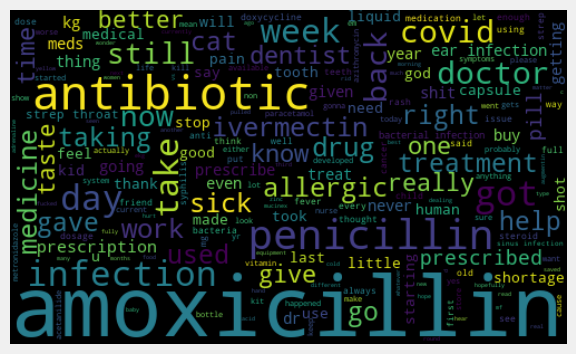

In [9]:
# Filter out non-string values (NaN or floats)
amoxi['New Tweet'] = amoxi['New Tweet'].astype(str)

# Plot Word Cloud
allWords = ' '.join([twts for twts in amoxi['New Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 0, 'Sentiments')

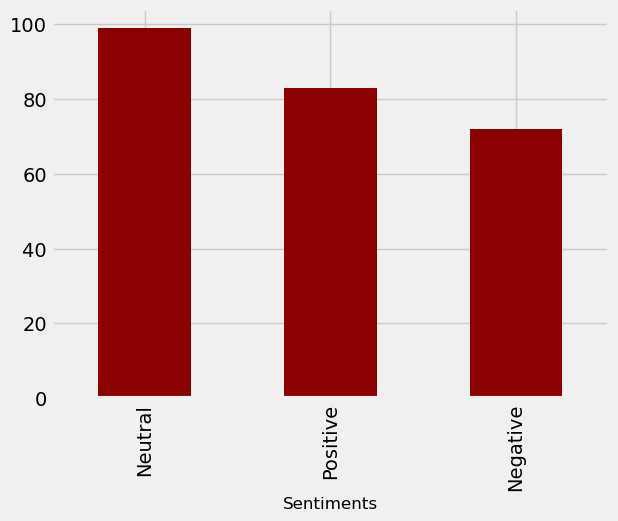

In [10]:
ax = amoxi['Analysis1'].value_counts().plot(kind='bar', color='darkred')
ax.set_xlabel("Sentiments", fontsize=12)

In [11]:
amoxi

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Word Count.1,Location,Retweet Count,Subjectivity,Polarity,Analysis,Subjectivity1,Polarity1,Analysis1
0,1,5.996285e+08,1.690000e+18,en,2023-08-21 10:26:24+00:00,RT @theliamnissan: Lauren Boebert calling for ...,21.0,lauren boebert calling abolishment dept educat...,12.0,NaN,3560,0.000000,0.000000,Neutral,0.000000,0.000000,Neutral
1,2,1.090000e+18,1.690000e+18,en,2023-08-21 09:14:02+00:00,"@amerix I wish I had read seen post last week,...",26.0,wish had read seen post last week bought ascor...,19.0,NaN,0,0.066667,0.000000,Neutral,0.066667,0.000000,Neutral
2,3,1.030000e+18,1.690000e+18,en,2023-08-21 09:09:19+00:00,"@bearish0411 if its COVID, amoxicillin will no...",23.0,its covid amoxicillin will not work pretty sur...,10.0,NaN,0,0.944444,0.375000,Positive,0.944444,0.375000,Positive
3,4,2.245928e+09,1.690000e+18,en,2023-08-21 09:09:16+00:00,"@missmulrooney alarm. got it. coincidentally, ...",14.0,alarm got coincidentally i have just started a...,10.0,NaN,0,0.000000,0.300000,Positive,0.000000,0.300000,Positive
4,5,1.590000e+18,1.690000e+18,en,2023-08-21 08:47:58+00:00,RT @skdembe: #BeAntibioticsAware... It's #Anti...,15.0,#beantibioticsaware it is #antibioticawareness...,8.0,NaN,1,0.300000,1.000000,Positive,0.300000,1.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,252,3.279965e+09,1.690000e+18,en,2023-08-14 14:01:33+00:00,Register now for this live webinar on GAS infe...,43.0,register now live webinar gas infections! facu...,23.0,NaN,0,0.466667,0.223485,Positive,0.450000,0.085227,Positive
250,253,1.560000e+18,1.690000e+18,en,2023-08-14 13:55:33+00:00,@BigLeeBronzer @bennyjohnson Yes it works for ...,19.0,yes it works among many other things amoxicil...,12.0,NaN,0,0.437500,0.187500,Positive,0.437500,0.187500,Positive
251,254,1.630000e+18,1.690000e+18,en,2023-08-14 12:55:52+00:00,"Amoxicillin, a versatile broad-spectrum antibi...",29.0,amoxicillin versatile broad-spectrum antibioti...,21.0,NaN,0,0.562500,0.262500,Positive,0.562500,0.262500,Positive
252,255,6.157062e+07,1.690000e+18,en,2023-08-14 12:27:23+00:00,Came into work with amoxicillin spit up all ov...,36.0,came into work amoxicillin spit up over cause ...,20.0,{'place_id': '00c55f041e27dc51'},0,0.647222,-0.397222,Negative,0.647222,-0.397222,Negative


In [12]:
# Define a function to map the values
def map_sentiment(analysis):
    if analysis == 'Negative':
        return -1
    elif analysis == 'Neutral':
        return 0
    elif analysis == 'Positive':
        return 1
    else:
        return None  # Handle other cases if needed

# Apply the mapping function to create a new 'Results' column
amoxi['Results'] = amoxi['Analysis'].map(map_sentiment)

# Display the updated DataFrame
amoxi

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Word Count.1,Location,Retweet Count,Subjectivity,Polarity,Analysis,Subjectivity1,Polarity1,Analysis1,Results
0,1,5.996285e+08,1.690000e+18,en,2023-08-21 10:26:24+00:00,RT @theliamnissan: Lauren Boebert calling for ...,21.0,lauren boebert calling abolishment dept educat...,12.0,NaN,3560,0.000000,0.000000,Neutral,0.000000,0.000000,Neutral,0
1,2,1.090000e+18,1.690000e+18,en,2023-08-21 09:14:02+00:00,"@amerix I wish I had read seen post last week,...",26.0,wish had read seen post last week bought ascor...,19.0,NaN,0,0.066667,0.000000,Neutral,0.066667,0.000000,Neutral,0
2,3,1.030000e+18,1.690000e+18,en,2023-08-21 09:09:19+00:00,"@bearish0411 if its COVID, amoxicillin will no...",23.0,its covid amoxicillin will not work pretty sur...,10.0,NaN,0,0.944444,0.375000,Positive,0.944444,0.375000,Positive,1
3,4,2.245928e+09,1.690000e+18,en,2023-08-21 09:09:16+00:00,"@missmulrooney alarm. got it. coincidentally, ...",14.0,alarm got coincidentally i have just started a...,10.0,NaN,0,0.000000,0.300000,Positive,0.000000,0.300000,Positive,1
4,5,1.590000e+18,1.690000e+18,en,2023-08-21 08:47:58+00:00,RT @skdembe: #BeAntibioticsAware... It's #Anti...,15.0,#beantibioticsaware it is #antibioticawareness...,8.0,NaN,1,0.300000,1.000000,Positive,0.300000,1.000000,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,252,3.279965e+09,1.690000e+18,en,2023-08-14 14:01:33+00:00,Register now for this live webinar on GAS infe...,43.0,register now live webinar gas infections! facu...,23.0,NaN,0,0.466667,0.223485,Positive,0.450000,0.085227,Positive,1
250,253,1.560000e+18,1.690000e+18,en,2023-08-14 13:55:33+00:00,@BigLeeBronzer @bennyjohnson Yes it works for ...,19.0,yes it works among many other things amoxicil...,12.0,NaN,0,0.437500,0.187500,Positive,0.437500,0.187500,Positive,1
251,254,1.630000e+18,1.690000e+18,en,2023-08-14 12:55:52+00:00,"Amoxicillin, a versatile broad-spectrum antibi...",29.0,amoxicillin versatile broad-spectrum antibioti...,21.0,NaN,0,0.562500,0.262500,Positive,0.562500,0.262500,Positive,1
252,255,6.157062e+07,1.690000e+18,en,2023-08-14 12:27:23+00:00,Came into work with amoxicillin spit up all ov...,36.0,came into work amoxicillin spit up over cause ...,20.0,{'place_id': '00c55f041e27dc51'},0,0.647222,-0.397222,Negative,0.647222,-0.397222,Negative,-1
